In [2]:
from bs4 import BeautifulSoup
import requests

def composit_us_presidents():
    # Get wikipedia list of presidents
    url = "https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    l = soup.table
    ps = l.find_all('tr')

    # Pull name & img url into dictonary
    composit = {}
    for p in ps:
        if p.b is not None:
            name =p.find_all('td')[2].b.big.a.text
            img_src = p.find_all('td')[0].img['src']
            # make it a complete URI
            img_src= "http://{}".format(img_src[2:])
            composit[name] = img_src
            
    return composit

def composit_dyn_employees():
    # Parse local copy of employee photos
    
    soup = BeautifulSoup(open("North America.html"), 'html.parser')
    ps = soup.findAll("div", { "class" : "flip-entry" })
    
    composit= {}
    for p in ps:
        name = p.findAll("div", { "class" : "flip-entry-title"})[0].text
        img_src = p.findAll("div", { "class" : "flip-entry-thumb"})[0].img['src']
        composit[name] = img_src
    
    return composit

composit = composit_dyn_employees()

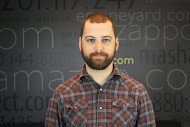

1: Vita, Cara.JPG
2: Sampat, SunilJPG.JPG
3: Torrisi, Matthew.JPG
4: McMurray, Becky(2).JPG

Choice?3


True

In [25]:
import random
from IPython.display import Image
from IPython.display import display
from IPython.core.display import HTML

def question_user(composit):
    choices= random.sample(composit.keys(), 4)
    answer = choices[0]
    random.shuffle(choices)
    
    img = composit[answer]
    f = open(img, "r")
    d = f.read()
    display(Image(data = d, format='png'))
    
    for i in range(0,4):
        print("{}: {}").format(i+1, choices[i])
    
    print
        
    selection = raw_input("Choice?" )
    
    return(choices[int(selection)-1] == answer)

question_user(composit)


Good Luck : 0 out of 0


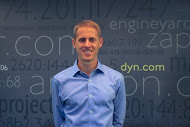

1: Young, Jon.JPG
2: Brian, Dan.JPG
3: Shaw, Phlllip.JPG
4: Kane, Lauren.JPG

Choice?3
Correct! : 1 out of 1


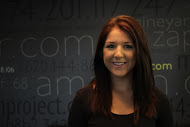

1: Praturu, Madhu (2).JPG
2: Smith, Katie.JPG
3: McAullife, Dan.JPG
4: Echeverria, Chad.JPG



In [ ]:
from IPython.display import clear_output
clear_output()

right = asked = 0
notice = "Good Luck"

for q in range(1,20):
    #clear_output()
    print("{} : {} out of {}").format(notice, right, asked)
    asked +=1
    if question_user(composit):
        right +=1
        notice = "Correct!"
    else:
        notice = "Wrong"
    